<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/Assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset (assuming it's in a CSV file named 'sales_data_with_discounts.csv')
try:
    df = pd.read_csv('sales_data_with_discounts.csv')
except FileNotFoundError:
    print("Error: 'sales_data_with_discounts.csv' not found. Please make sure the dataset file is in the correct directory.")
    exit()


# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

if numerical_cols.empty:
    print("No numerical columns found in the dataset.")
else:
    # Calculate basic statistical measures for numerical columns (excluding mode for now)
    stats = df[numerical_cols].agg(['mean', 'median', 'std'])

    # Calculate mode separately for each numerical column
    mode_stats = df[numerical_cols].apply(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else None)

    # Transpose the mode_stats to match the stats DataFrame's structure
    mode_stats = pd.DataFrame([mode_stats], index=['mode'])

    # Combine all stats
    stats = pd.concat([stats, mode_stats])

    # Print the statistical measures
    print("Basic Statistical Measures for Numerical Columns:")
    display(stats)

    # Provide a brief interpretation of these statistics
    print("\nInterpretation:")
    print("- Mean: The average value of the data.")
    print("- Median: The middle value when the data is sorted.")
    print("- Mode: The most frequent value in the data (if multiple modes exist, only the first is shown).")
    print("- Standard Deviation: A measure of the spread or dispersion of the data.")

Basic Statistical Measures for Numerical Columns:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
median,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
mode,3.000000,400.000000,24300.000000,5.007822,69.177942,326.974801



Interpretation:
- Mean: The average value of the data.
- Median: The middle value when the data is sorted.
- Mode: The most frequent value in the data (if multiple modes exist, only the first is shown).
- Standard Deviation: A measure of the spread or dispersion of the data.


### Visualizing Distributions of Numerical Variables

Let's start by visualizing the distribution of the numerical columns using histograms and boxplots. This will help us understand the spread, central tendency, and identify potential outliers in the data.

Generating histograms for numerical columns:


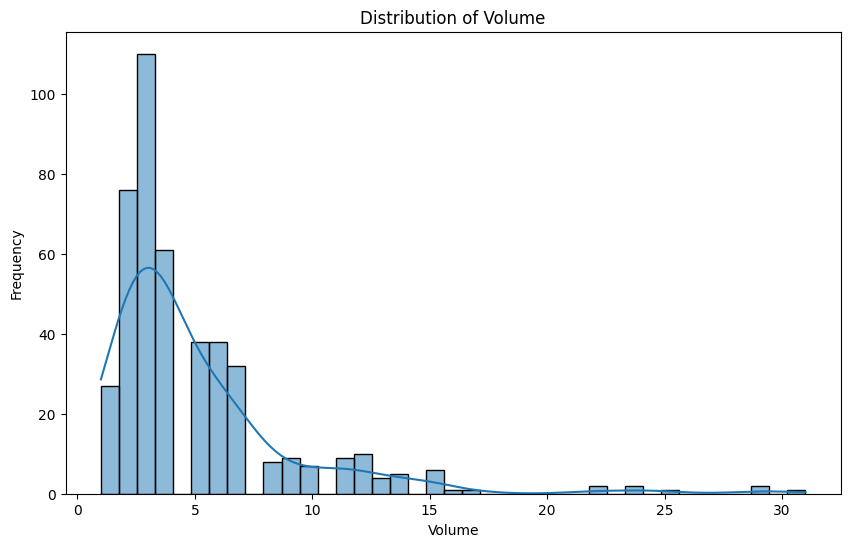

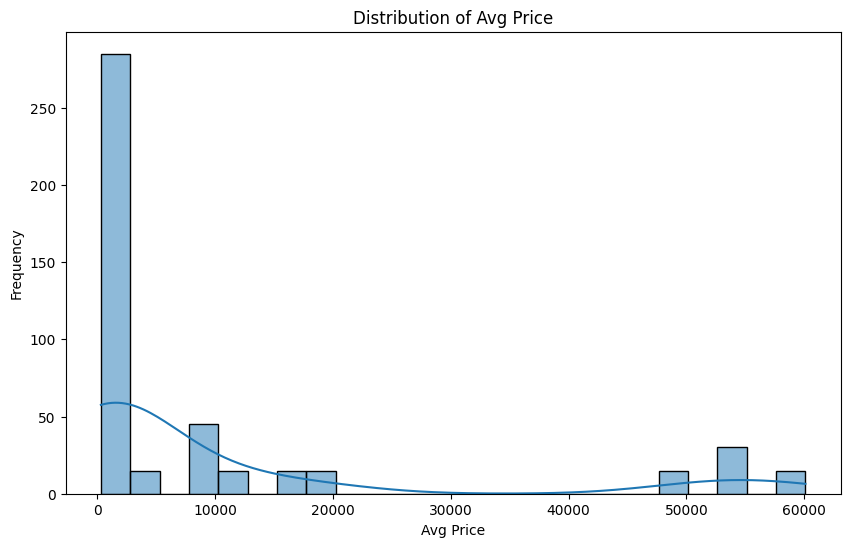

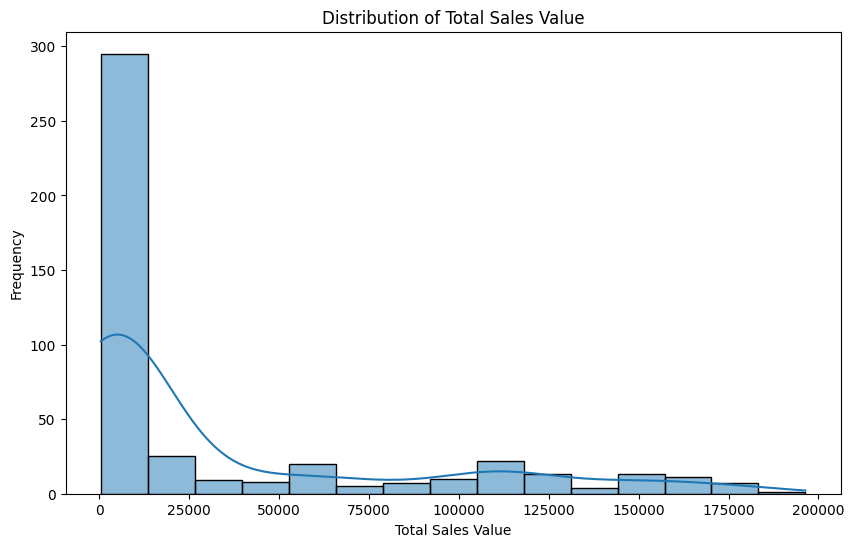

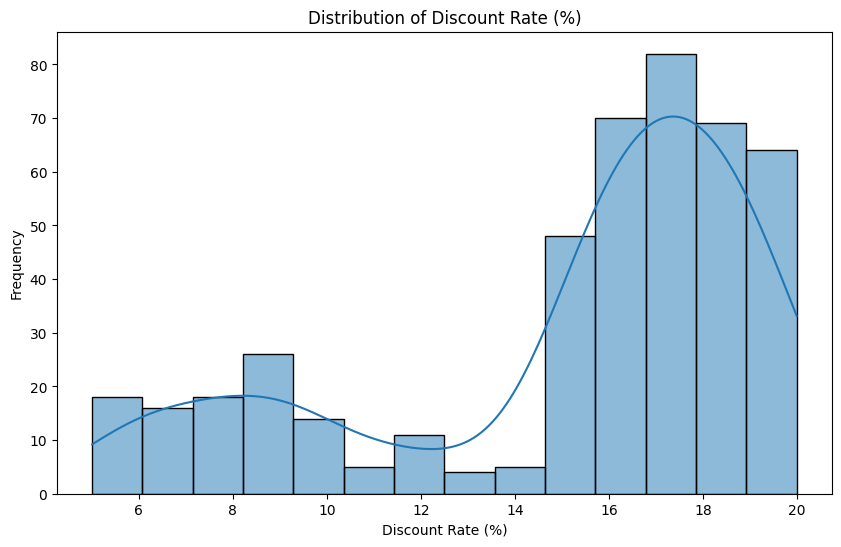

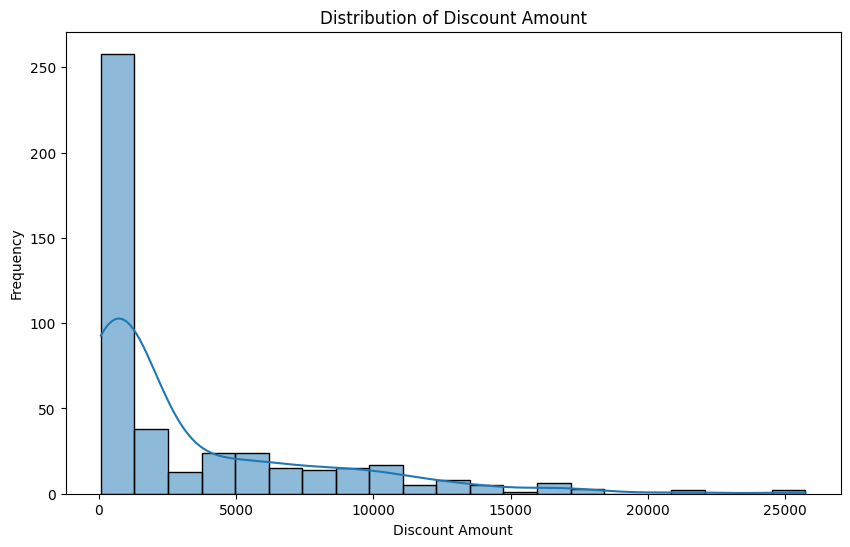

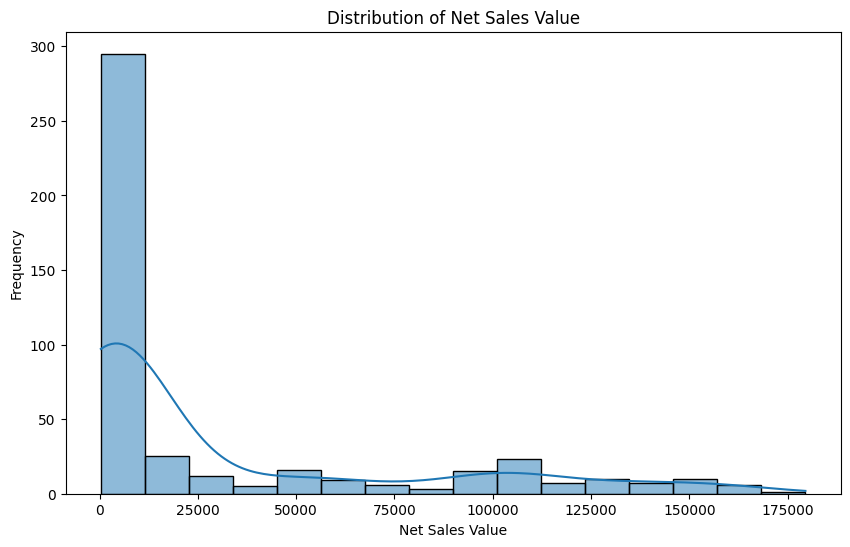

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number']).columns

if numerical_cols.empty:
    print("No numerical columns found to plot.")
else:
    print("Generating histograms for numerical columns:")
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

### Identifying Outliers with Boxplots

Now, let's create boxplots for the numerical columns to further examine the spread and identify outliers.

Generating boxplots for numerical columns:


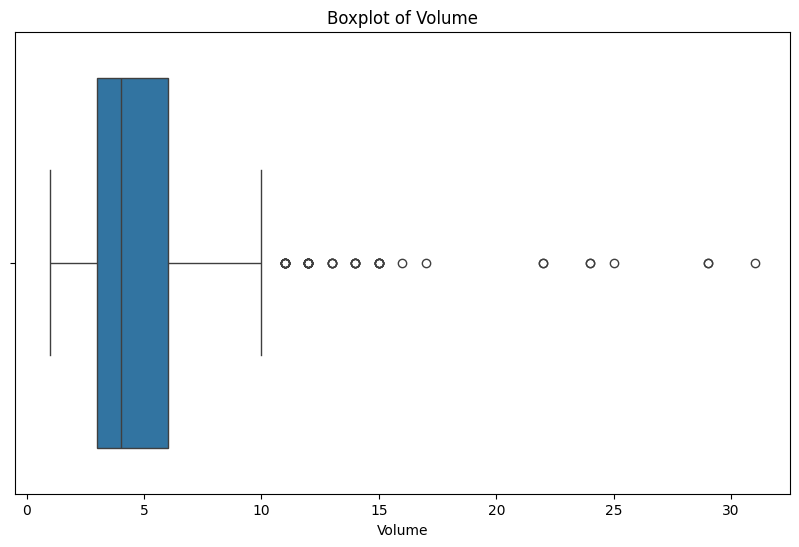

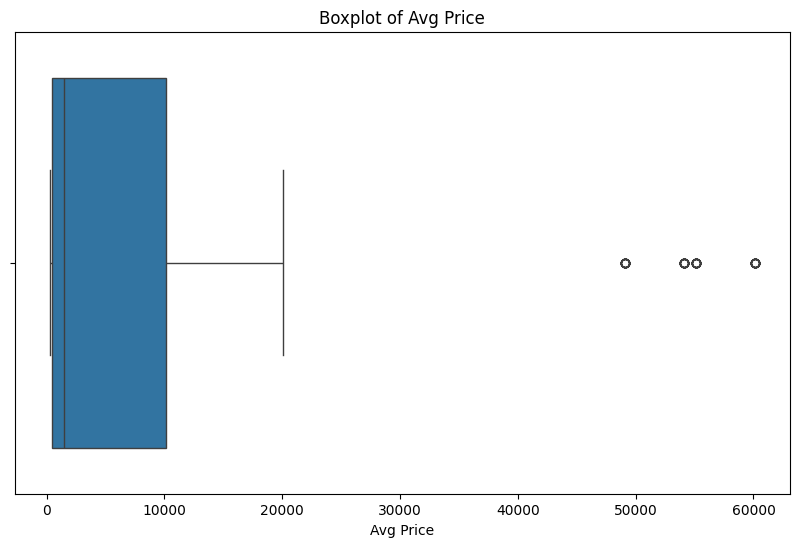

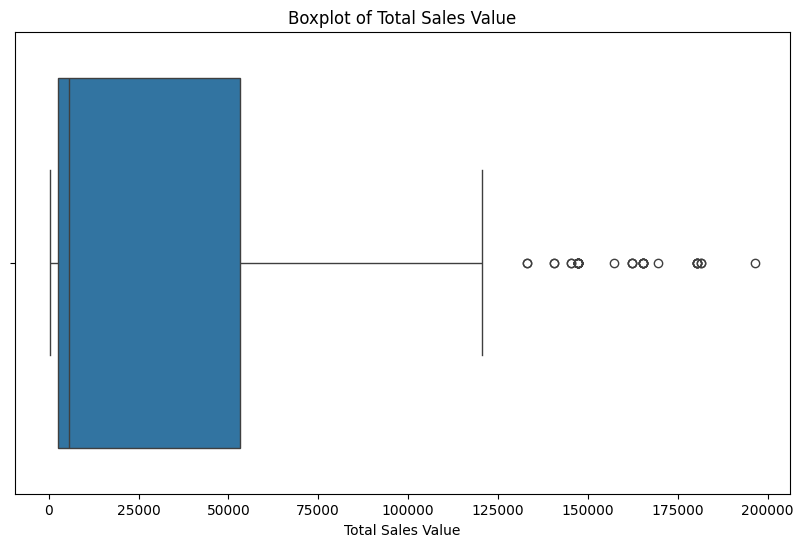

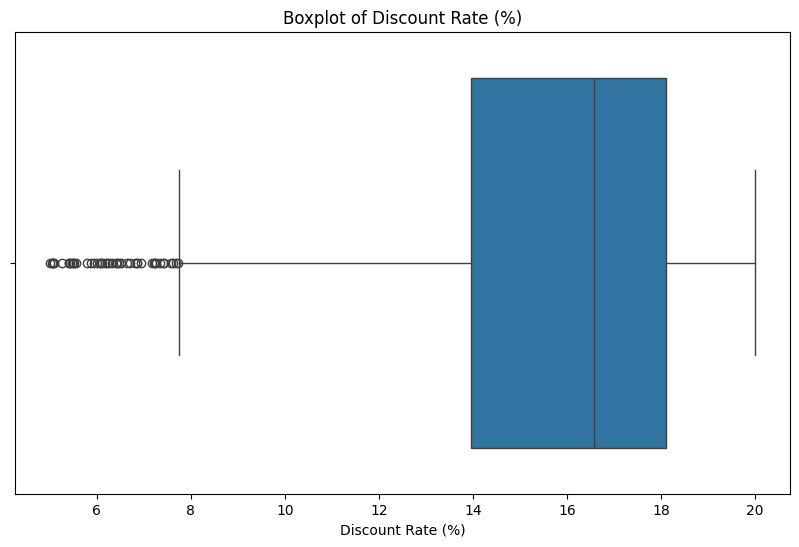

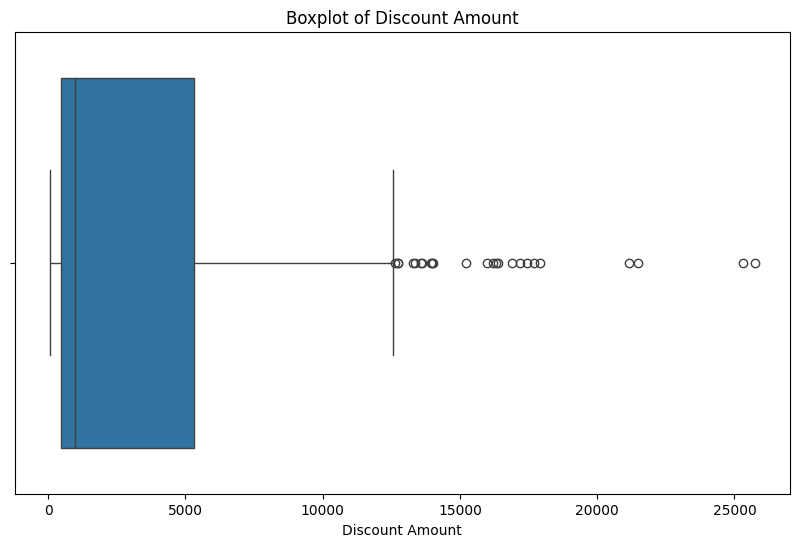

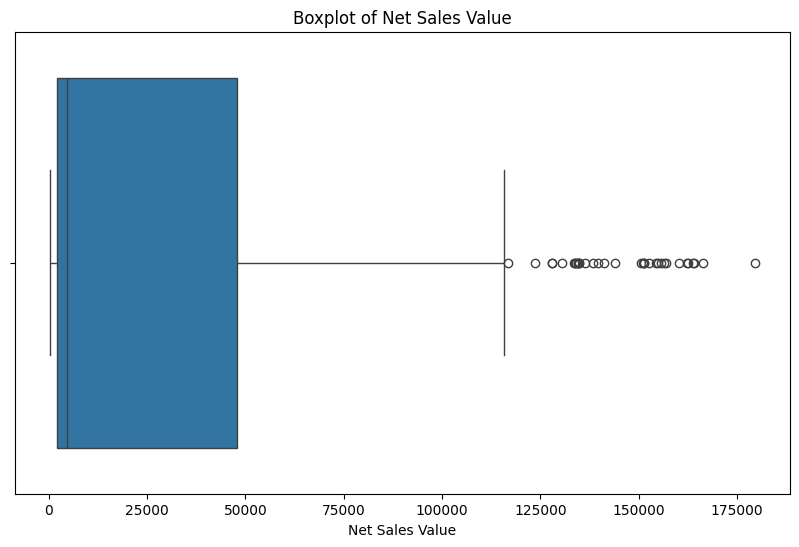

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number']).columns

if numerical_cols.empty:
    print("No numerical columns found to plot boxplots.")
else:
    print("Generating boxplots for numerical columns:")
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

### Analyzing Categorical Variable Distributions

Next, let's visualize the distribution of categorical variables using bar charts to see the frequency of each category.

Generating bar charts for categorical columns:


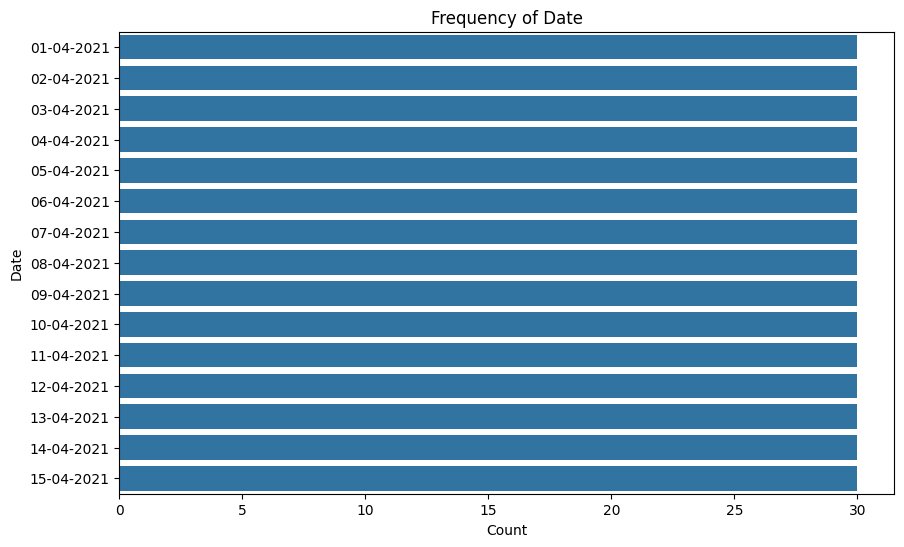

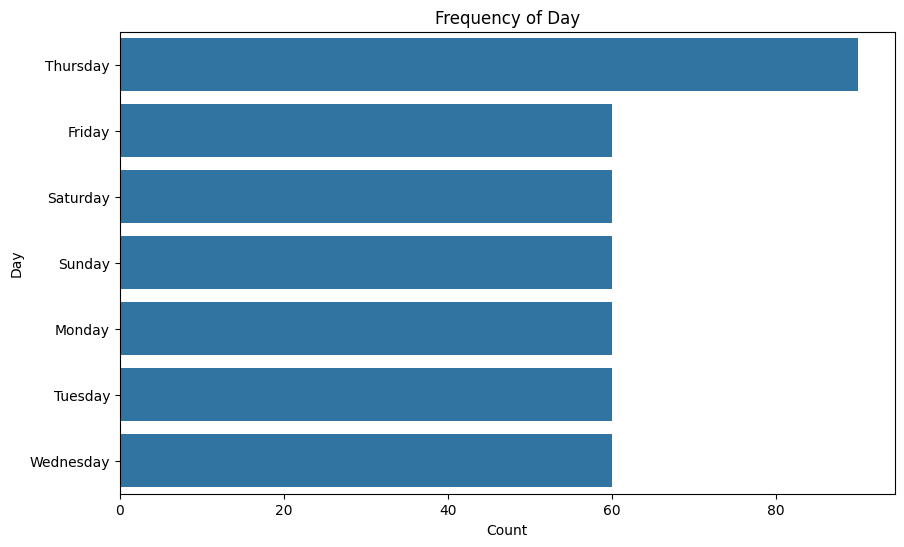

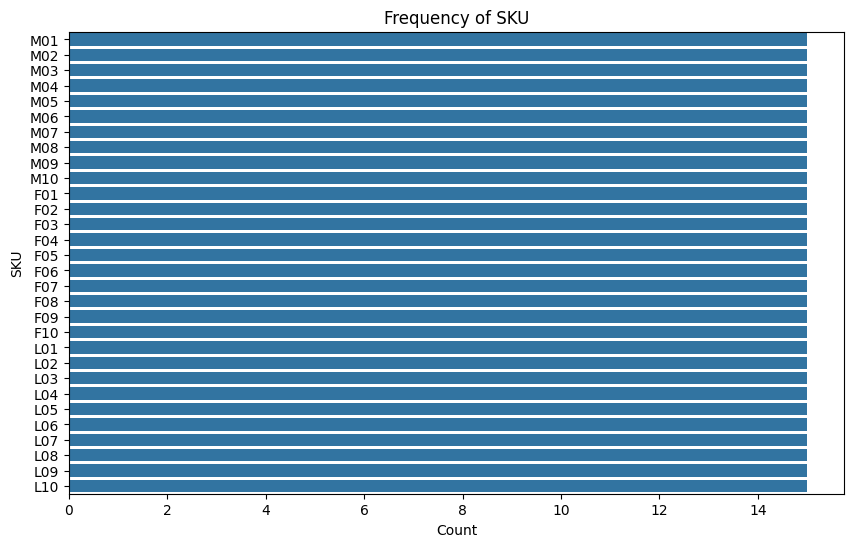

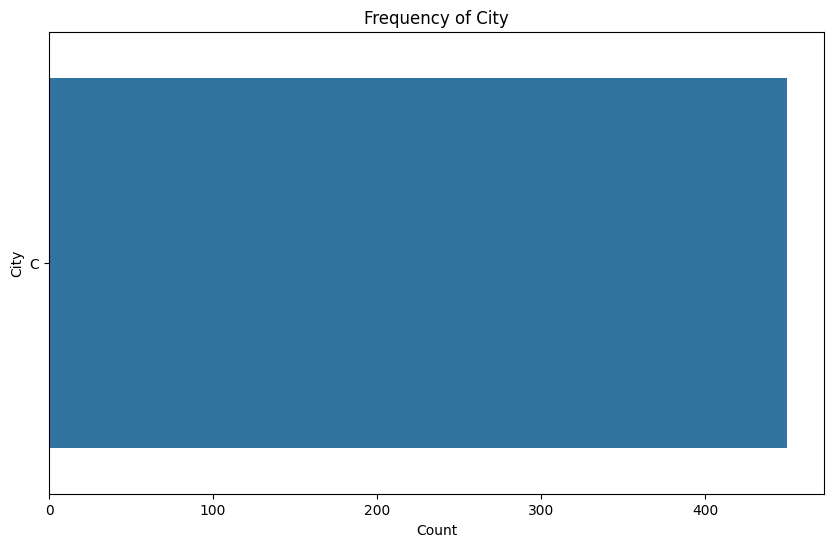

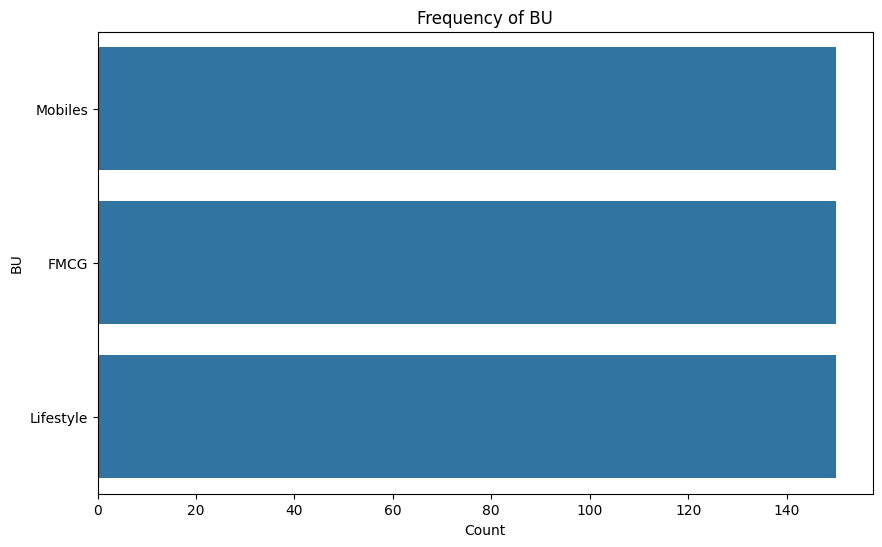

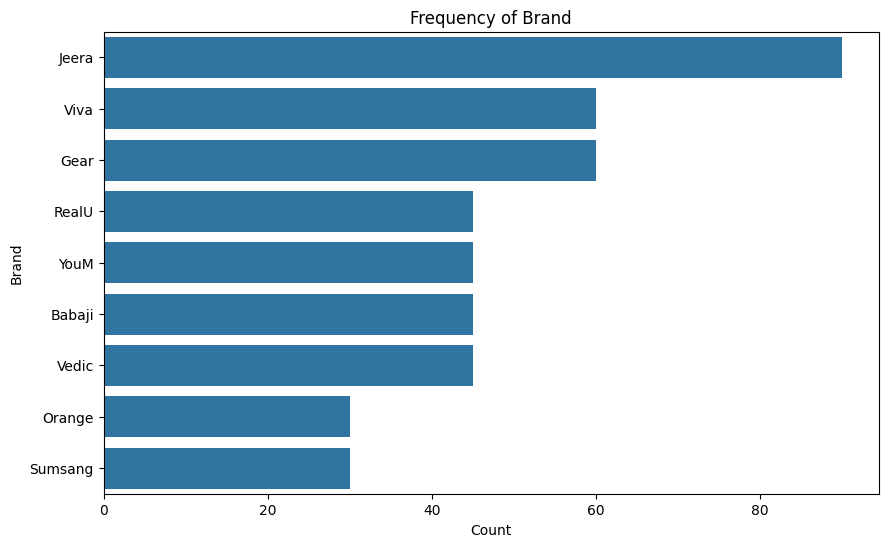

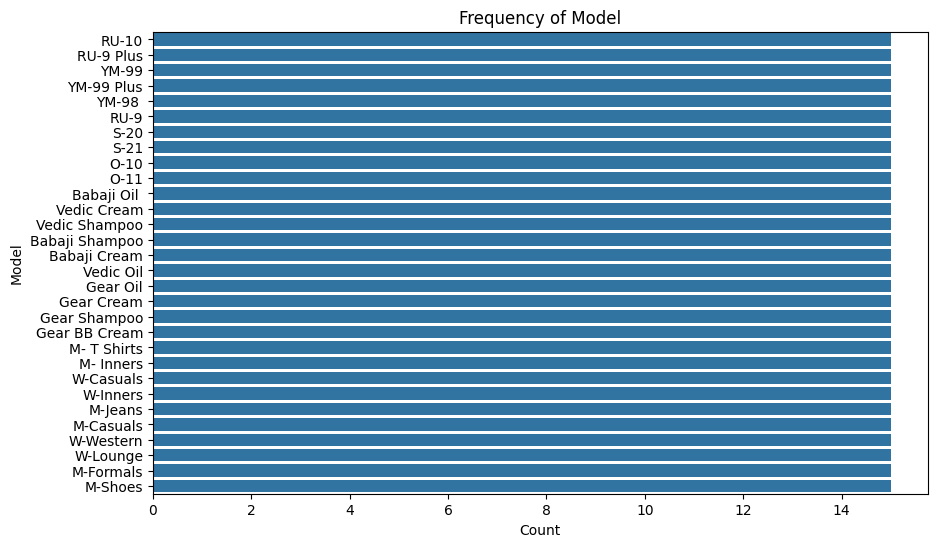

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

if categorical_cols.empty:
    print("No categorical columns found to plot.")
else:
    print("Generating bar charts for categorical columns:")
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[col], order = df[col].value_counts().index)
        plt.title(f'Frequency of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

Standardization (Z-score normalization) is a technique used to scale numerical features so that they have a mean of 0 and a standard deviation of 1. This helps to make the features comparable and improves the performance of many machine learning algorithms.

Visualizing distributions before and after standardization:


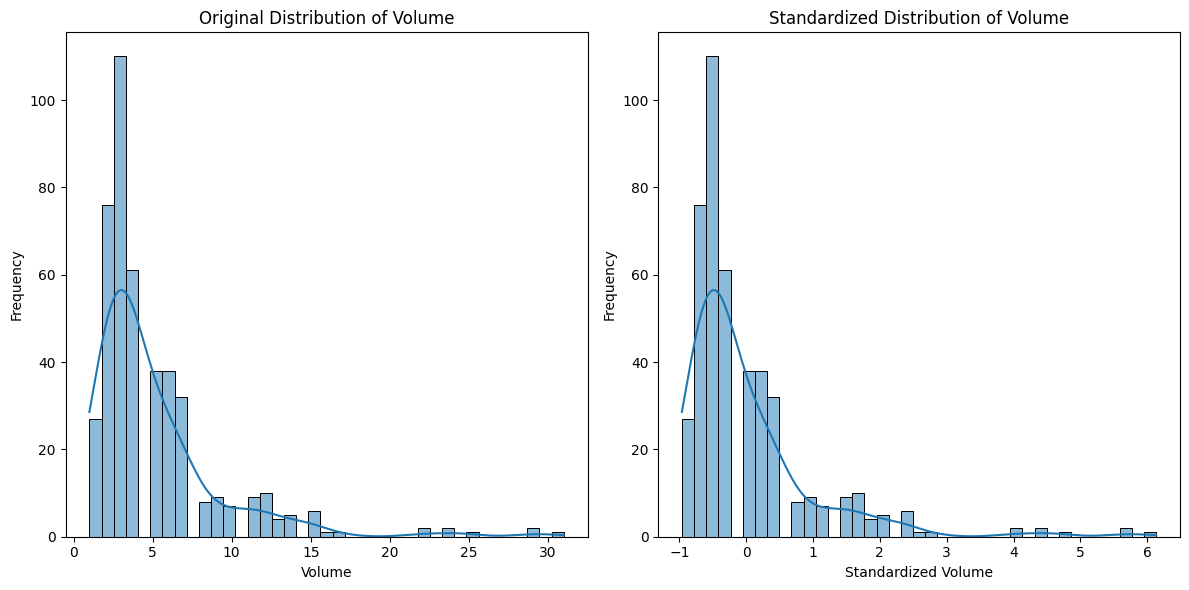

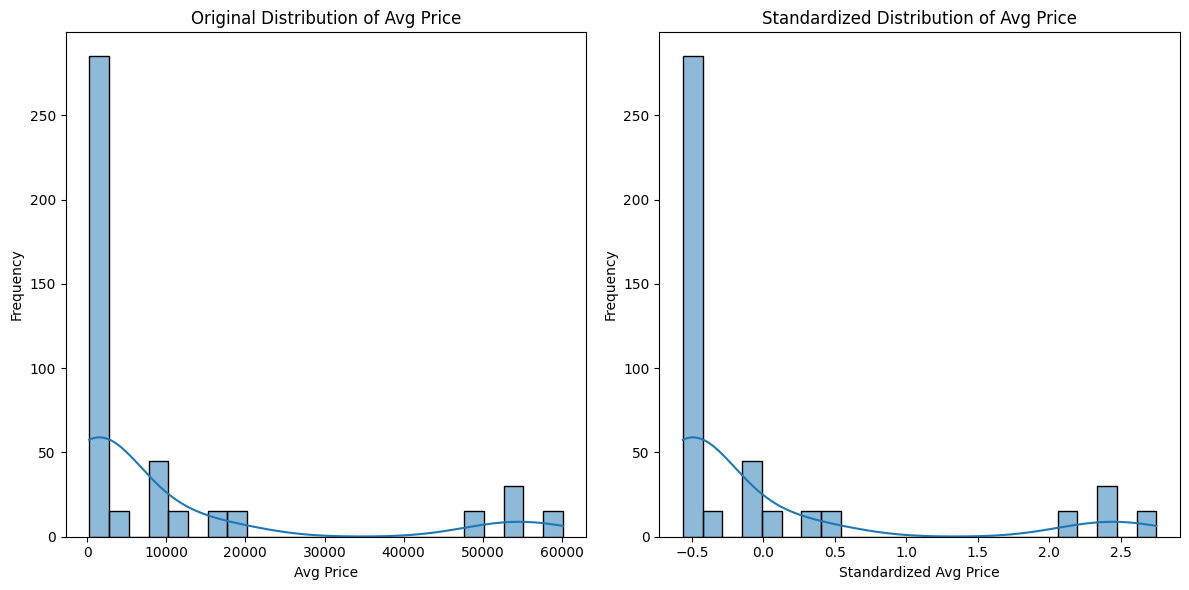

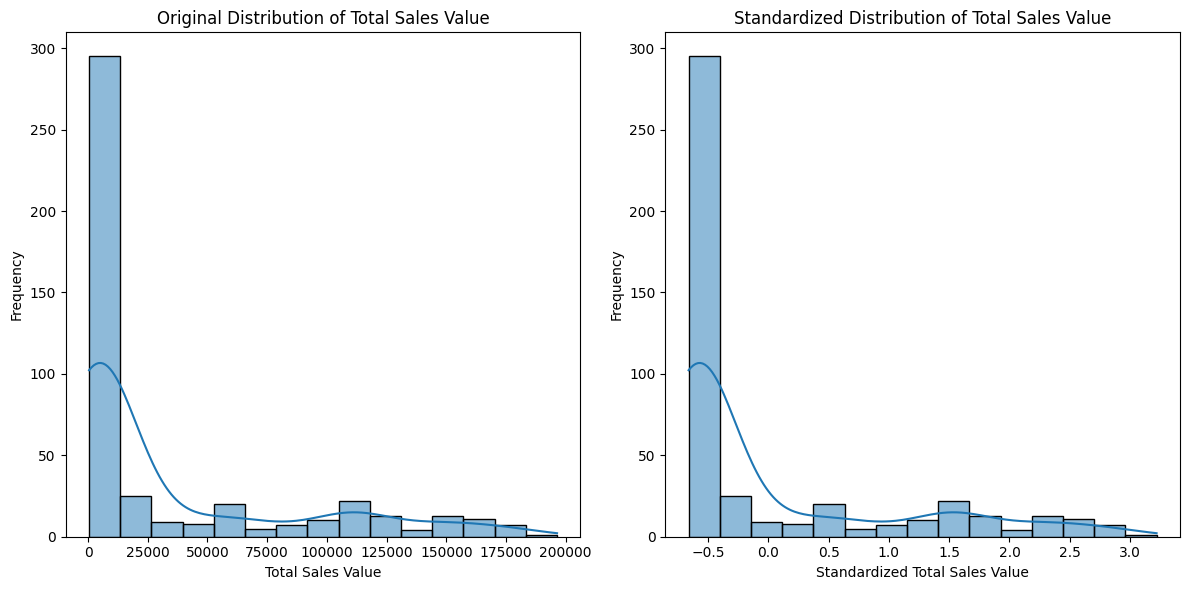

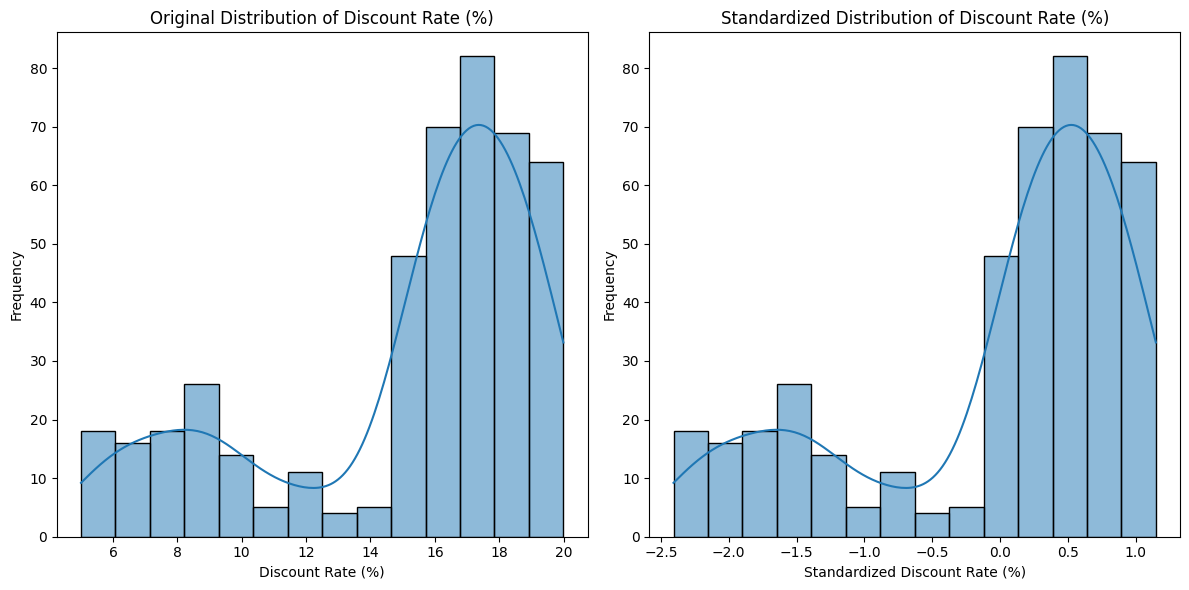

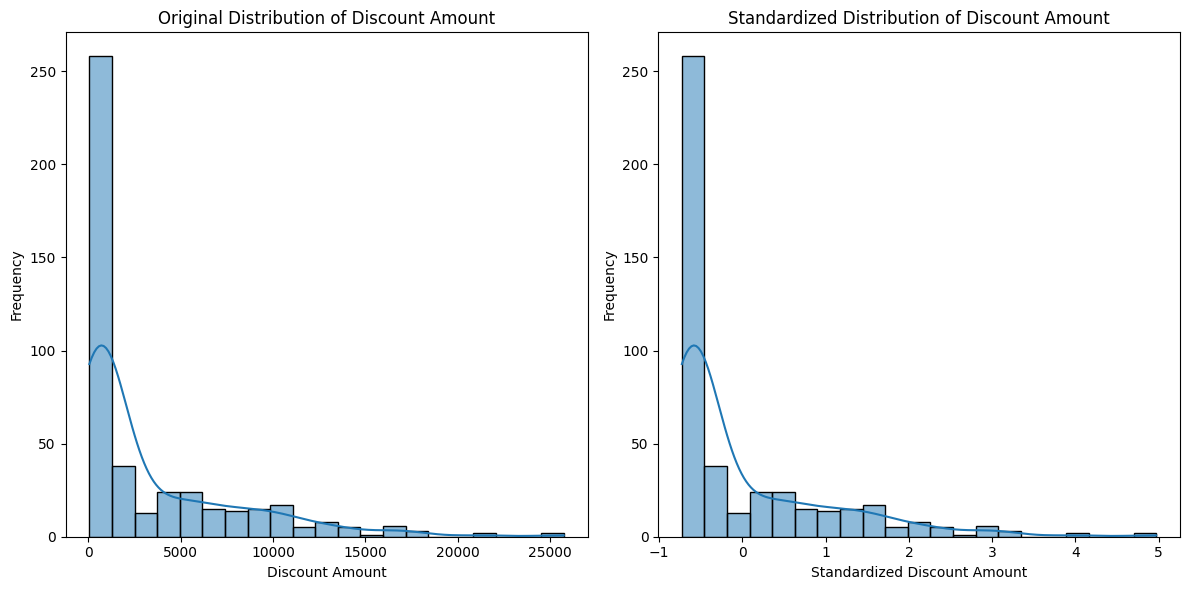

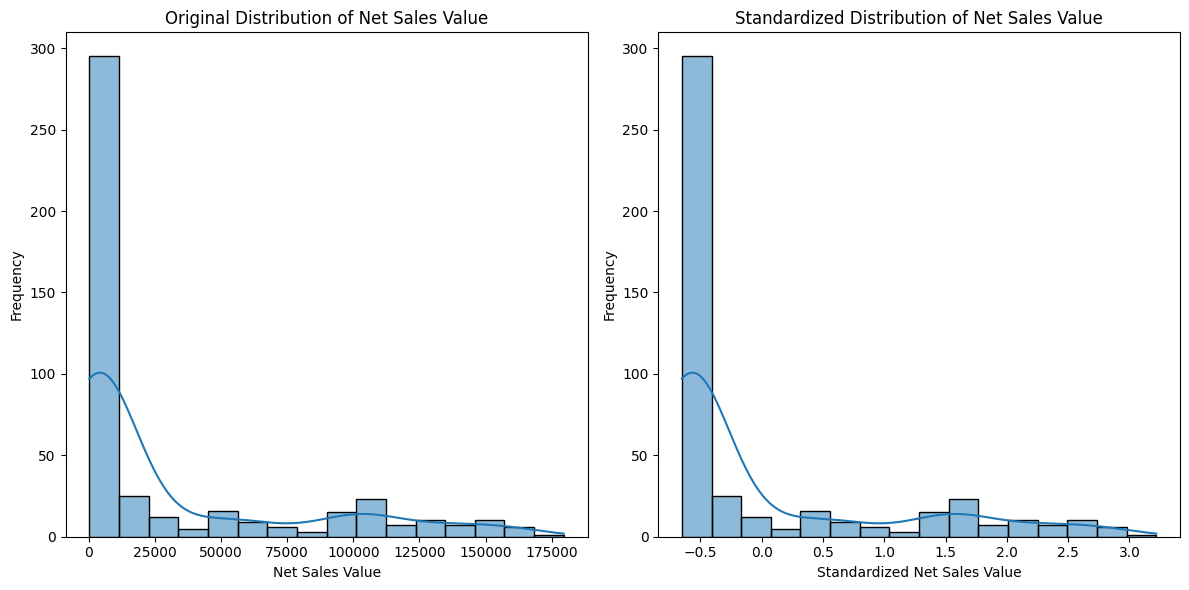

In [6]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Explain standardization
print("Standardization (Z-score normalization) is a technique used to scale numerical features so that they have a mean of 0 and a standard deviation of 1. This helps to make the features comparable and improves the performance of many machine learning algorithms.")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

if numerical_cols.empty:
    print("No numerical columns found to standardize.")
else:
    # Create a StandardScaler instance
    scaler = StandardScaler()

    # Apply standardization to numerical columns
    df_scaled = df.copy()
    df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

    # Show before and after comparisons of the data distributions using histograms
    print("\nVisualizing distributions before and after standardization:")
    for col in numerical_cols:
        plt.figure(figsize=(12, 6))

        # Original distribution
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Original Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Standardized distribution
        plt.subplot(1, 2, 2)
        sns.histplot(df_scaled[col], kde=True)
        plt.title(f'Standardized Distribution of {col}')
        plt.xlabel(f'Standardized {col}')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

In [7]:
import pandas as pd

# Discuss the need for converting categorical data into dummy variables (one-hot encoding)
print("One-hot encoding is a technique used to convert categorical variables into a numerical format that can be used by machine learning algorithms. It creates new binary columns for each unique category in the original column, where a '1' indicates the presence of that category and a '0' indicates its absence.")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

if categorical_cols.empty:
    print("\nNo categorical columns found to encode.")
else:
    # Apply one-hot encoding to the categorical columns
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True to avoid multicollinearity

    # Display a portion of the transformed dataset
    print("\nTransformed dataset with one-hot encoded categorical variables:")
    display(df_encoded.head())

One-hot encoding is a technique used to convert categorical variables into a numerical format that can be used by machine learning algorithms. It creates new binary columns for each unique category in the original column, where a '1' indicates the presence of that category and a '0' indicates its absence.

Transformed dataset with one-hot encoded categorical variables:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
